1. Explore different types of network datasets. Create a graph dataset of any type (CSV, GML, etc.) that comprises 10 nodes and 30 edges. Further, generate a network using the dataset and perform the following operations-

a. Density of the network

b. BFS and DFS traversal order

c. Clustering coefficients (local and average)

d. Average path lengths

e. Degree distribution curve

In [1]:
import networkx as nx
import csv
import pandas as pd

In [2]:
G = pd.read_csv('/content/drive/MyDrive/sample3.csv', sep = ',', header = None)

In [3]:
G

0   1
0    1   2
1    2   6
2    3   9
3    4   7
4    5   9
5    6   8
6    7   2
7    8   6
8    9   7
9   10   5
10   1   3
11   1   5
12   2   3
13   2   8
14   3  10
15   3   4
16   4   8
17   4   9
18   5   4
19   5   3
20   6   2
21   6   7
22   7   1
23   7   3
24   8   4
25   8   5
26   9   3
27   9   2
28  10   4
29  10   3

In [4]:
G.shape

(30, 2)

In [5]:
G1 = nx.Graph()
G1.add_edges_from(G.values.tolist())


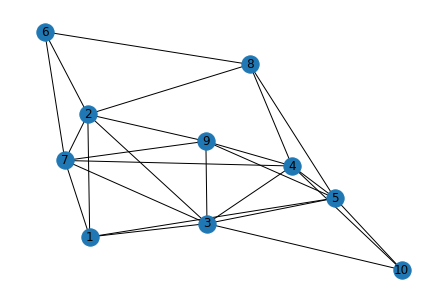

In [6]:
nx.draw(G1, with_labels = True)


In [7]:
 den = nx.density(G1)
 den

0.5555555555555556

In [8]:
BFS = nx.bfs_tree(G1, source=1, reverse=False, depth_limit=None, sort_neighbors=None)


In [9]:
nx.dfs_tree(G1, source=None, depth_limit=None)

In [10]:
nx.average_clustering(G1, nodes=None, weight=None, count_zeros=True)

0.5938095238095238

In [11]:
nx.clustering(G1, nodes=None, weight=None)

{1: 0.6666666666666666,
 2: 0.4666666666666667,
 6: 0.6666666666666666,
 3: 0.5714285714285714,
 9: 0.7,
 4: 0.5333333333333333,
 7: 0.5333333333333333,
 5: 0.4666666666666667,
 8: 0.3333333333333333,
 10: 1.0}

In [12]:
nx.average_shortest_path_length(G1, weight=None)

1.4666666666666666

In [13]:
import matplotlib.pyplot as plt


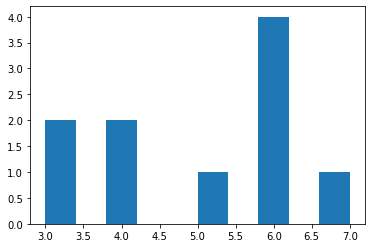

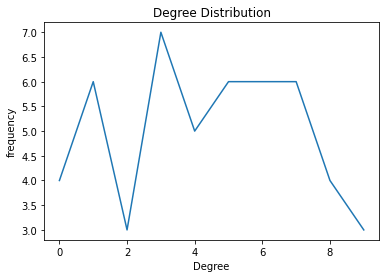

In [16]:
def plot_degree_dist(G1):
    degrees = [G1.degree(n) for n in G1.nodes()]
    plt.hist(degrees)
    plt.show()
    plt.plot(degrees)
    plt.title("Degree Distribution")
    plt.xlabel('Degree')
    plt.ylabel('frequency')
    plt.show()

plot_degree_dist(nx.Graph(G1))

2. Download the facebook_combined dataset and perform the following operations-

a. Find the number of nodes and edges in dataset

b. Find the longest shortest path

c. Find the influential node in the network using

i. Degree centrality

ii. Closeness centrality

iii. Betweenness centrality

iv. Find all neighbours of the nodes

v. Plot Degree distribution curve

In [17]:
G2 = nx.read_edgelist('/content/drive/MyDrive/Lab-3/facebook_combined.txt', create_using= nx.Graph(), nodetype=int)

In [18]:
nx.info(G2)

'Graph with 4039 nodes and 88234 edges'

In [19]:
#print(nx.shortest_path_length(G2, source=None, target=None, weight=None, method='bellman-ford'))

In [20]:
path_length = dict(nx.all_pairs_shortest_path_length(G2, cutoff=None))
path_list = list(path_length)

In [21]:
max(path_list)

4038

In [22]:
N_nodes = nx.number_of_nodes(G2)
N_nodes

4039

In [23]:
G = nx.fast_gnp_random_graph(N_nodes, p=0.1, seed=0)

In [24]:
degCent = nx.degree_centrality(G)

In [25]:
#Descending order sorting centrality
degCent_sorted=dict(sorted(degCent.items(), key=lambda item: item[1],reverse=True))
degCent_sorted

{3580: 0.1178801386825161,
 3674: 0.11614660723130261,
 910: 0.11589895988112926,
 1115: 0.11540366518078256,
 706: 0.11490837048043585,
 1327: 0.11490837048043585,
 194: 0.1146607231302625,
 647: 0.1146607231302625,
 1598: 0.1146607231302625,
 1609: 0.11441307578008915,
 1721: 0.11391778107974244,
 3311: 0.11391778107974244,
 1162: 0.11367013372956909,
 1563: 0.11367013372956909,
 3595: 0.11367013372956909,
 3699: 0.11342248637939574,
 966: 0.11317483902922239,
 3041: 0.11292719167904902,
 3275: 0.11292719167904902,
 247: 0.11267954432887567,
 2974: 0.11267954432887567,
 393: 0.11243189697870232,
 2360: 0.11243189697870232,
 3647: 0.11243189697870232,
 415: 0.11218424962852896,
 2655: 0.11218424962852896,
 3118: 0.11218424962852896,
 3182: 0.11218424962852896,
 3714: 0.11218424962852896,
 1239: 0.11193660227835561,
 3585: 0.11193660227835561,
 113: 0.11168895492818226,
 159: 0.11168895492818226,
 573: 0.11168895492818226,
 798: 0.11168895492818226,
 1942: 0.11168895492818226,
 2499: 0

In [26]:
closeCent = nx.closeness_centrality(G)

In [27]:
#Descending order sorting centrality
closeCent_sorted=dict(sorted(closeCent.items(), key=lambda item: item[1],reverse=True))
closeCent_sorted

{3580: 0.5313157894736842,
 3674: 0.5308268699881687,
 910: 0.5307570977917981,
 1115: 0.5306176084099868,
 706: 0.5304781923279033,
 1327: 0.5304781923279033,
 194: 0.5304085117562065,
 647: 0.5304085117562065,
 1598: 0.5304085117562065,
 1609: 0.5303388494877856,
 1721: 0.5301995798319328,
 3311: 0.5301995798319328,
 1162: 0.5301299724300906,
 1563: 0.5301299724300906,
 3595: 0.5301299724300906,
 3699: 0.5300603833027041,
 966: 0.5299908124425777,
 3041: 0.5299212598425197,
 3275: 0.5299212598425197,
 247: 0.5298517254953418,
 2974: 0.5298517254953418,
 393: 0.5297822093938599,
 2360: 0.5297822093938599,
 3647: 0.5297822093938599,
 415: 0.5297127115308934,
 2655: 0.5297127115308934,
 3118: 0.5297127115308934,
 3182: 0.5297127115308934,
 3714: 0.5297127115308934,
 1239: 0.5296432318992654,
 3585: 0.5296432318992654,
 113: 0.5295737704918033,
 159: 0.5295737704918033,
 573: 0.5295737704918033,
 798: 0.5295737704918033,
 1942: 0.5295737704918033,
 2499: 0.5295737704918033,
 2699: 0.5295

In [37]:
betCent = nx.betweenness_centrality(G, normalized = True, endpoints= True)

In [38]:
#Descending order sorting centrality
betCent_sorted=dict(sorted(betCent.items(), key=lambda item: item[1],reverse=True))
betCent_sorted

{3580: 0.0008054668813115977,
 3674: 0.0007958334731390183,
 1115: 0.0007926878280693048,
 910: 0.0007921645777063442,
 194: 0.0007893721643599172,
 706: 0.0007887911094029137,
 1598: 0.0007877716156575156,
 1327: 0.000787388189093347,
 647: 0.0007871759336974926,
 1609: 0.0007862288805276412,
 1162: 0.0007848321840034698,
 3311: 0.0007845730616066332,
 1721: 0.0007842395041273349,
 1563: 0.0007818412157940451,
 3699: 0.0007816929441331662,
 3595: 0.0007815581866287947,
 966: 0.0007798058122927665,
 3041: 0.0007786442021845939,
 3275: 0.0007780499978691311,
 3647: 0.000777703874642893,
 2360: 0.0007775214667354655,
 247: 0.0007772185705735486,
 3714: 0.0007763075998113502,
 2974: 0.0007760837556145899,
 3182: 0.0007755951942643612,
 3585: 0.0007753542354371042,
 3118: 0.0007749207739394425,
 393: 0.000774627254187265,
 2655: 0.0007740307811461566,
 113: 0.0007736608386284015,
 1942: 0.0007735535299585526,
 798: 0.0007734621436397378,
 415: 0.0007733639596998556,
 1239: 0.00077277153561

In [29]:
for n in G.nodes():
    print(n, ':', end = ' ')
    for neig in G.neighbors(n):
        print(neig, end=' ')
    print('')

0 : 13 19 21 23 30 40 50 57 65 67 71 72 74 93 100 107 153 180 183 185 190 194 201 202 219 223 233 246 281 309 321 332 344 347 352 367 374 393 404 408 414 421 429 461 475 485 490 505 515 517 520 526 528 538 560 565 578 579 586 600 608 615 622 624 625 635 638 647 666 668 670 672 676 694 698 715 732 738 743 772 774 786 787 794 808 813 819 824 829 830 832 835 839 846 848 883 912 916 917 963 964 966 971 976 986 1041 1047 1069 1070 1089 1117 1119 1132 1133 1142 1180 1182 1203 1208 1219 1223 1233 1267 1271 1277 1280 1323 1333 1345 1351 1359 1375 1377 1405 1409 1421 1431 1437 1440 1441 1462 1491 1504 1515 1516 1524 1527 1547 1549 1568 1578 1579 1603 1621 1624 1639 1649 1702 1717 1721 1737 1739 1745 1759 1770 1776 1779 1782 1784 1790 1795 1806 1808 1809 1819 1821 1824 1830 1848 1850 1852 1866 1869 1871 1884 1893 1899 1900 1905 1923 1938 1963 1972 1998 2019 2020 2039 2042 2053 2056 2058 2068 2072 2074 2077 2086 2088 2105 2106 2115 2125 2140 2143 2149 2152 2157 2166 2175 2201 2206 2215 2217 2218 

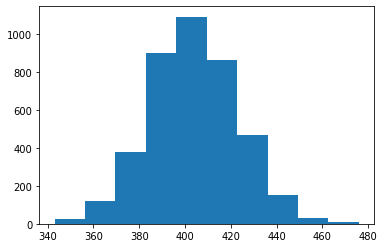

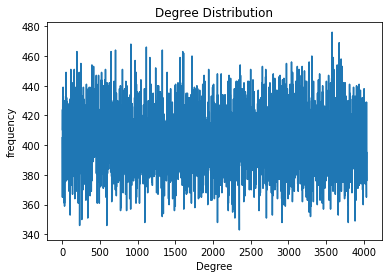

In [30]:
plot_degree_dist(nx.Graph(G))

3. Generate a random network using erdos_renyi model. To generate the random network, take n nodes and probability p from the user and add an edge randomly between any pair of nodes using the probability p. Also, display the degree distribution for the network.

Enter no. of nodes:26
Enter probability:.23


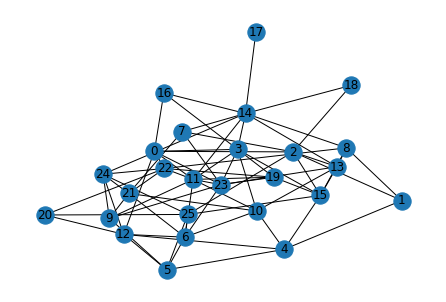

In [35]:
n = int(input('Enter no. of nodes:'))
p = float(input('Enter probability:'))
G3 = nx.erdos_renyi_graph(n, p, seed= None, directed = False)
nx.draw(G3, with_labels= True)

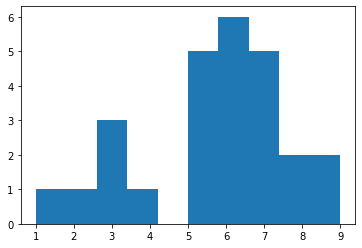

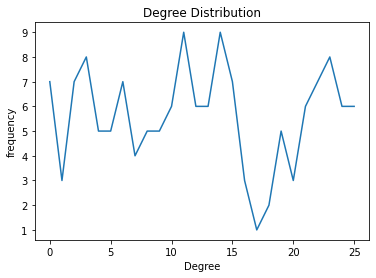

In [36]:
plot_degree_dist(nx.Graph(G3))
